# Shift-Only Time Warping

The `affinewarp` package supports two types of time warping: `PiecewiseWarping` and `ShiftWarping`. Here, we demonstrate `ShiftWarping` which is the simplest.

In [7]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Helper function for generating shifted data
from affinewarp.datasets import jittered_data

In [11]:
currentdir = os.path.dirname(os.path.realpath('Fig0_shift_warp_PCA.ipynb'))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

In [15]:
#% cd '/home/lorenlab/Documents/driftrack/examples'

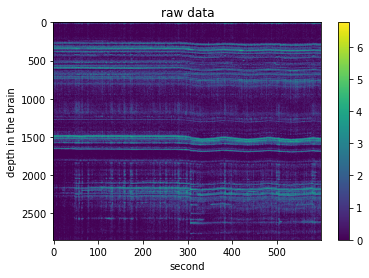

In [14]:
# load real data
data = np.load('data/data_1of_a_second.npy').T
data=np.log(1+data)
data=np.expand_dims(data, axis=2)

# Plot data.
plt.imshow(np.squeeze(data).T, aspect='auto')
plt.title('raw data'), plt.xlabel('second'), plt.ylabel('depth in the brain')
plt.colorbar()

In [4]:
np.shape(data)

(600, 2851, 1)

 ### Fit model, plot reconstruction error over time.
 
Since the data is very noisy, we'll add a roughness penalty to the model template to damp down high-frequency noise. This isn't entirely necessary for this simple example, but can be useful in real datasets.

Loss: 1.14: 100%|██████████| 25/25 [14:28<00:00, 34.73s/it]


Text(0, 0.5, 'model loss')

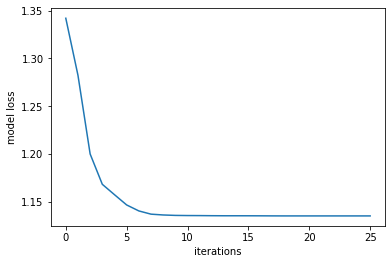

In [9]:
from affinewarp import ShiftWarping
from affinewarp import PiecewiseWarping
from affinewarp import ShiftWarping_PCA

# Create the model. Add a roughness penalty to the model template.
model = ShiftWarping_PCA(maxlag=.1, smoothness_reg_scale=0)
#model = PiecewiseWarping(n_knots=2, smoothness_reg_scale=10.)

# Fit the model.
model.fit(data, iterations=25)

# Plot model learning curve.
plt.plot(model.loss_hist)
plt.xlabel('iterations')
plt.ylabel('model loss')

In [33]:
np.shape(model.template)

(2851, 1, 2)

### Plot the model estimate of the data

Note that the model estimate is denoised compared to the raw data we plotted above.

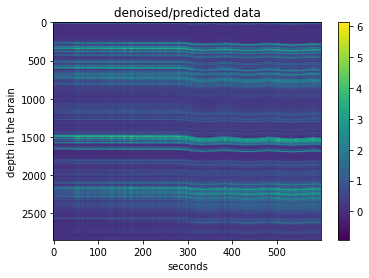

In [37]:
plt.imshow(model.predict().squeeze().T, aspect='auto')
plt.title('denoised/predicted data'), plt.xlabel('seconds'), plt.ylabel('depth in the brain')
plt.colorbar()

### Apply the learned warping functions to align the data across trials

(Text(0.5, 0, 'depth'), Text(0, 0.5, 'depth in the brain'))

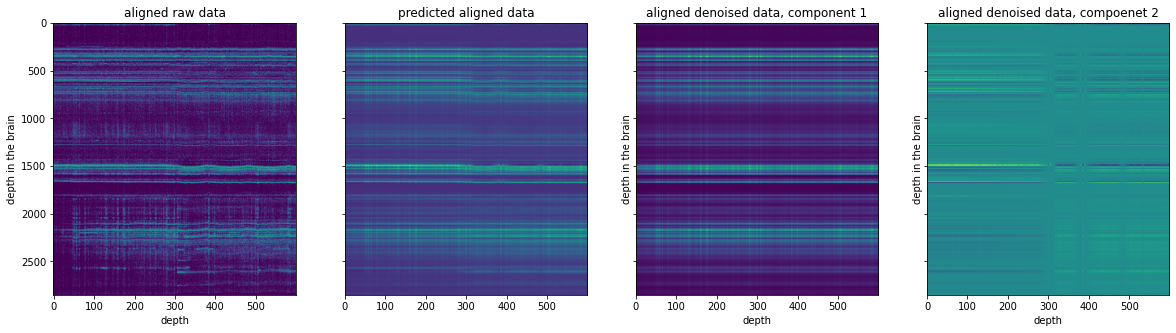

In [40]:
fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(20, 5))
axes[0].imshow(model.transform(data).squeeze().T, aspect='auto')
axes[0].set_title('aligned raw data'), 
axes[0].set_xlabel('depth'), axes[0].set_ylabel('depth in the brain')

recon1=np.matmul(model.amps[:,0].reshape((-1,1)),model.template[:,0,0].reshape((1,-1)))
recon2=np.matmul(model.amps[:,1].reshape((-1,1)),model.template[:,0,1].reshape((1,-1)))

axes[1].imshow(recon1.T+recon2.T, aspect='auto')
axes[1].set_title('predicted aligned data'), 
axes[1].set_label('depth'), axes[0].set_ylabel('depth in the brain')

axes[2].imshow(recon1.T, aspect='auto')
axes[2].set_title('aligned denoised data, component 1'), 
axes[2].set_xlabel('depth'), axes[2].set_ylabel('depth in the brain')

axes[3].imshow(recon2.T, aspect='auto')
axes[3].set_title('aligned denoised data, compoenet 2'), 
axes[3].set_xlabel('depth'), axes[3].set_ylabel('depth in the brain')


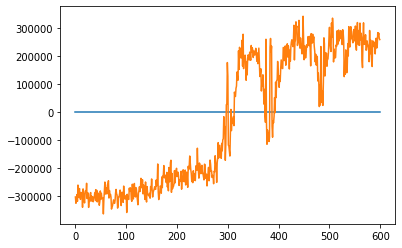

In [14]:
plt.plot(model.amps[:,0])
plt.plot(model.amps[:,1])

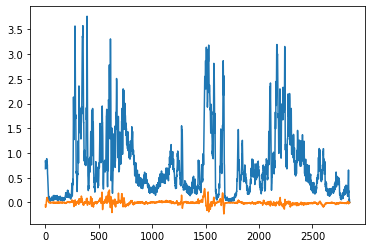

In [15]:
plt.plot(model.template[:,0,0]*np.mean(model.amps[:,0]))
plt.plot(model.template[:,0,1]*np.mean(model.amps[:,1]))